# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ("output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_summary = []

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

for city in cities:
    cityInfo = url + city
    try:
        cityDetails = requests.get(cityInfo).json()
        country = cityDetails['sys']['country']
        city_Latitude = cityDetails['coord']['lat']
        city_Longitude = cityDetails['coord']['lon']
        city_Temp = cityDetails['main']['temp_max']
        city_Humid = cityDetails['main']['humidity']
        city_Cloud = cityDetails['clouds']['all']
        city_Wind = cityDetails['wind']['speed']
        city_summary.append({ 
            "City": city,
            "Country": country,
            "Latitude": city_Latitude,
            "Longitude": city_Longitude,
            "Temperature": city_Temp,
            "Humidity": city_Humid,
            "Cloudiness": city_Cloud,
            "Wind Speed": city_Wind 
             })
    except:
        print(f'{city} is not found')

barentsburg is not found
utiroa is not found
warqla is not found
taolanaro is not found
vestbygda is not found
mys shmidta is not found
tsihombe is not found
illoqqortoormiut is not found
nizhneyansk is not found
formoso do araguaia is not found
grand river south east is not found
tanshui is not found
sentyabrskiy is not found
umzimvubu is not found
belushya guba is not found
satitoa is not found
karauzyak is not found
barawe is not found
longlac is not found
cumaribo is not found
saleaula is not found
attawapiskat is not found
khonuu is not found
mergui is not found
cockburn harbour is not found
vaitupu is not found
stoyba is not found
burica is not found
metsovon is not found
calian is not found
tuggurt is not found
ardistan is not found
chagda is not found
yingzhong is not found
kazalinsk is not found
rungata is not found
tasbuget is not found
grand centre is not found
bur gabo is not found
bargal is not found
haibowan is not found
amderma is not found
jiroft is not found
lolua is n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_summary_df = pd.DataFrame(city_summary)
city_summary_df.to_csv("city_summary.csv", index = False)

In [5]:
city_summary_df

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,flin flon,CA,54.77,-101.86,61.90,91,61,4.34
1,vanimo,PG,-2.67,141.30,85.91,63,4,9.15
2,rikitea,PF,-23.12,-134.97,70.16,83,98,20.78
3,norman wells,CA,65.28,-126.83,59.00,62,20,5.82
4,namibe,AO,-15.20,12.15,61.95,90,59,2.59
...,...,...,...,...,...,...,...,...
536,zacatlan,MX,19.93,-97.97,56.16,88,93,4.32
537,fonte boa,BR,-2.50,-66.27,76.37,76,0,1.72
538,kloulklubed,PW,7.04,134.26,86.00,70,75,10.29
539,popondetta,PG,-8.75,148.25,86.13,58,14,7.11


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
# I changed it to 100% OR greater, since I don't think humidity can never acutally be 100% 

city_summary_index_df = city_summary_df.set_index("City")
try:
    citiesToRemove_df = city_summary_index_df.loc[city_summary_index_df["Humidity"] >= 100, :]
    citiesToRemove_df
except:
    print("There are no cities that have humidity 100% or more")

print(citiesToRemove_df)    

                    Country  Latitude  Longitude  Temperature  Humidity  \
City                                                                      
aberdeen                 GB     57.14      -2.10        61.00       100   
yellowknife              CA     62.46    -114.35        57.20       100   
smithfield               US     41.92     -71.55        63.00       100   
acajutla                 SV     13.59     -89.83        69.01       100   
oussouye                 SN     12.48     -16.55        78.80       100   
salalah                  OM     17.02      54.09        77.00       100   
cayenne                  GF      4.93     -52.33        75.20       100   
quepos                   CR      9.42     -84.17        69.80       100   
maceio                   BR     -9.67     -35.74        69.80       100   
tarabuco                 BO    -19.17     -64.92        41.02       100   
la ronge                 CA     55.10    -105.28        60.80       100   
ketchikan                

In [7]:
removeCity = np.array(citiesToRemove_df.index.tolist())

for cityR in removeCity:
    CityToRemove = city_summary_df[city_summary_df['City'] == cityR].index
    city_summary_clean_df = city_summary_df.drop(CityToRemove, inplace=False)
    
city_summary_clean_df

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,flin flon,CA,54.77,-101.86,61.90,91,61,4.34
1,vanimo,PG,-2.67,141.30,85.91,63,4,9.15
2,rikitea,PF,-23.12,-134.97,70.16,83,98,20.78
3,norman wells,CA,65.28,-126.83,59.00,62,20,5.82
4,namibe,AO,-15.20,12.15,61.95,90,59,2.59
...,...,...,...,...,...,...,...,...
536,zacatlan,MX,19.93,-97.97,56.16,88,93,4.32
537,fonte boa,BR,-2.50,-66.27,76.37,76,0,1.72
538,kloulklubed,PW,7.04,134.26,86.00,70,75,10.29
539,popondetta,PG,-8.75,148.25,86.13,58,14,7.11


In [8]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

city_summary_clean_df.to_csv("city_summary_clean.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

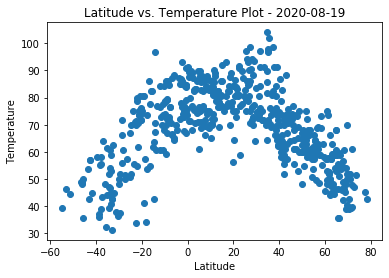

In [9]:
from datetime import date

today = date.today()
plt.title(f"Latitude vs. Temperature Plot - {today}")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(city_summary_clean_df["Latitude"],city_summary_clean_df["Temperature"])

plt.savefig("Latitude_vs_Temperature.png")

In [10]:
#This Latitude vs. Temperature Plot in analyzing if there is a relationship of city locations based on latitude and the maximum temperatures. The code is plotting every sample city we grabbed and plotting their latitude (x-axis) and the maximum temperature (y-axis).

## Latitude vs. Humidity Plot

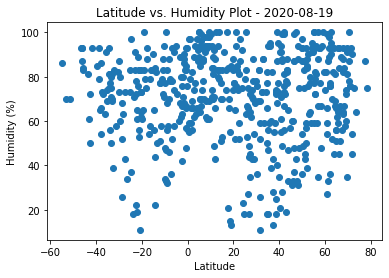

In [11]:
plt.title(f"Latitude vs. Humidity Plot - {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(city_summary_clean_df["Latitude"],city_summary_clean_df["Humidity"])

plt.savefig("Latitude_vs_Humidity.png")

In [12]:
#This Latitude vs. Humidity Plot in analyzing if there is a relationship of city locations based on latitude and the humidity in percentage at these cities. The code is plotting every sample city we grabbed and plotting their latitude (x-axis) and the humidity in percentage (y-axis).

## Latitude vs. Cloudiness Plot

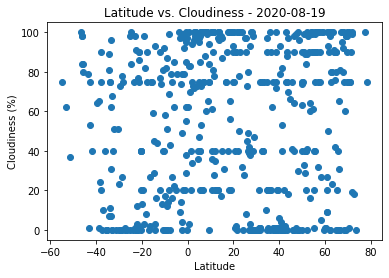

In [13]:
plt.title(f"Latitude vs. Cloudiness - {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(city_summary_clean_df["Latitude"],city_summary_clean_df["Cloudiness"])

plt.savefig("Latitude_vs_Cloudiness.png")

In [14]:
#This Latitude vs. Cloudiness Plot in analyzing if there is a relationship of city locations based on latitude and the cloudiness in percentage at these cities. The code is plotting every sample city we grabbed and plotting their latitude (x-axis) and the cloudiness in percentage (y-axis).

## Latitude vs. Wind Speed Plot

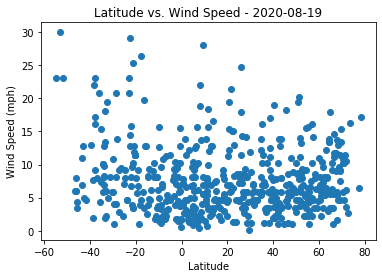

In [15]:
plt.title(f"Latitude vs. Wind Speed - {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(city_summary_clean_df["Latitude"],city_summary_clean_df["Wind Speed"])

plt.savefig("Latitude_vs_Wind_Speed.png")

In [16]:
#This Latitude vs. Wind Speed Plot in analyzing if there is a relationship of city locations based on latitude and the wind speed in miles per hour at these cities. The code is plotting every sample city we grabbed and plotting their latitude (x-axis) and the wind speed in miles per hour (y-axis).

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

import scipy.stats as st

def scatplot(data, data2):
    correlation = st.pearsonr(data, data2)
    print(f"The correlation is {correlation[0]}")
    slope, intercept, rvalue, pvalue, stderr = st.linregress(data, data2)
    regress_values = slope*data + intercept
    plt.scatter(data, data2)
    plt.plot(data,regress_values,"r-")
    return plt.show()
    

In [18]:
# Create Northern and Southern Hemisphere DataFrames
NorthHemisCities_df = city_summary_clean_df.copy(deep=True)
SouthHemisCities_df = city_summary_clean_df.copy(deep=True)

NorthHemis = NorthHemisCities_df[NorthHemisCities_df["Latitude"] < 0].index
NorthHemisCities_df.drop(NorthHemis,inplace = True)

SouthHemis = SouthHemisCities_df[SouthHemisCities_df["Latitude"] > 0].index
SouthHemisCities_df.drop(SouthHemis,inplace = True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation is -0.7329340693988355


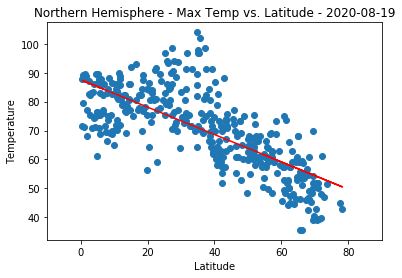

In [19]:
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude - {today}")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylabel("Temperature")

scatplot(NorthHemisCities_df["Latitude"],NorthHemisCities_df["Temperature"])


In [20]:
#Looking at the Northern Hemisphere - Max Temp vs. Latitude Linear Regression scatter plot, it looks like we have a negative correlation between the latitude of the sample cities that are located on the Northern Hemisphere and the maximum temperature at these cities. The further away the cities are north of the equator (larger latitude), the lower the maximum temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation is 0.7467853866199501


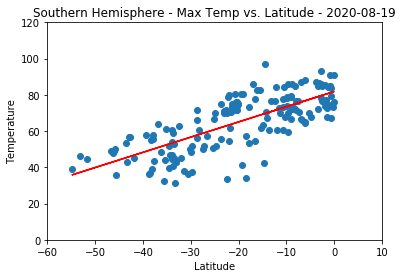

In [21]:
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude - {today}")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(-60,10)
plt.ylim(0,120)

scatplot(SouthHemisCities_df["Latitude"],SouthHemisCities_df["Temperature"])

In [22]:
#Looking at the Southern Hemisphere - Max Temp vs. Latitude Linear Regression scatter plot, it looks like we have a positive correlation between the latitude of the sample cities that are located on the Southern Hemisphere and the maximum temperature at these cities. The further away the cities are south of the equator (larger negative latitude), the lower the maximum temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation is -0.05810155491114071


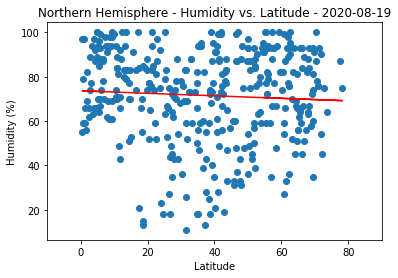

In [23]:
plt.title(f"Northern Hemisphere - Humidity vs. Latitude - {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-10,90)
scatplot(NorthHemisCities_df["Latitude"],NorthHemisCities_df["Humidity"])

In [24]:
#Looking at the Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression scatter plot, we cannot say if there is a correlation between the latitude of the sample cities that are located on the Northern Hemisphere and the humidity at these cities. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation is 0.7467853866199501


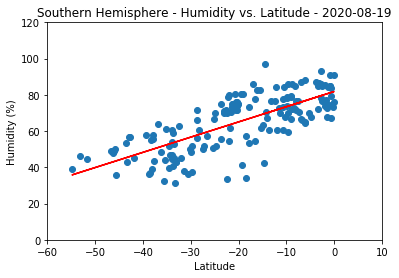

In [25]:
plt.title(f"Southern Hemisphere - Humidity vs. Latitude - {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60,10)
plt.ylim(0,120)

scatplot(SouthHemisCities_df["Latitude"],SouthHemisCities_df["Temperature"])

In [26]:
#Looking at the Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression scatter plot, it looks like we have a positive correlation between the latitude of the sample cities that are located on the Southern Hemisphere and the humidity at these cities. The further away the cities are south of the equator (larger negative latitude), the lower the humidity percentage.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation is -0.06828535715284242


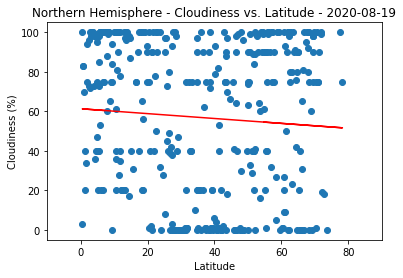

In [27]:
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude - {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-10,90)
scatplot(NorthHemisCities_df["Latitude"],NorthHemisCities_df["Cloudiness"])

In [28]:
#Looking at the Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression scatter plot, we cannot say if there is a correlation between the latitude of the sample cities that are located on the Northern Hemisphere and the cloudiness in percentage at these cities. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation is 0.03384449152345902


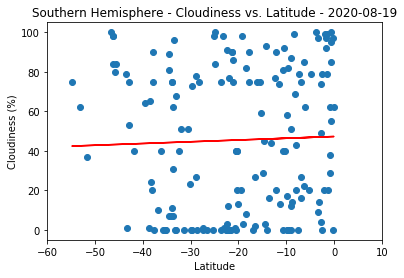

In [29]:
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude - {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60,10)
scatplot(SouthHemisCities_df["Latitude"],SouthHemisCities_df["Cloudiness"])

In [30]:
#Looking at the Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression scatter plot, we cannot say if there is a correlation between the latitude of the sample cities that are located on the Southern Hemisphere and the cloudiness in percentage at these cities. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation is 0.06579016854181327


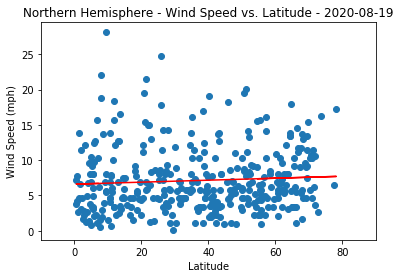

In [31]:
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude - {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-10,90)
scatplot(NorthHemisCities_df["Latitude"],NorthHemisCities_df["Wind Speed"])

In [32]:
#Looking at the Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression scatter plot, we cannot say if there is a correlation between the latitude of the sample cities that are located on the Northern Hemisphere and the wind speed in miles per hour at these cities.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation is -0.32970459088829046


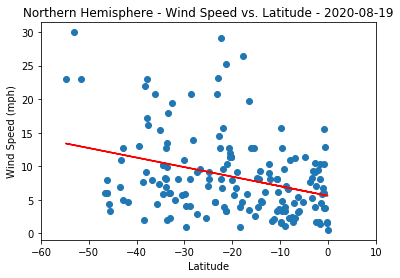

In [33]:
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude - {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-60,10)
scatplot(SouthHemisCities_df["Latitude"],SouthHemisCities_df["Wind Speed"])

In [34]:
#Looking at the Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression scatter plot, we cannot say if there is a correlation between the latitude of the sample cities that are located on the Southern Hemisphere and the wind speed in miles per hour at these cities.